# Laboratorio di Simulazione Numerica: lezione 2

Elia Steve, 47122A

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy

### Esercizio 2.1

In questo esercizio dobbiamo calcolare l'integrale

$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

in due modi: campionando una distribuzione uniforme e usando il metodo dell'importance sampling. Per quest'ultimo modo ho deciso di campionare dalla distribuzione di probabilità su $[0, 1]$

$$p(x) = \frac{3}{2}(1-x^2),$$

che è simile all'integranda, come si vede nel grafico seguente.

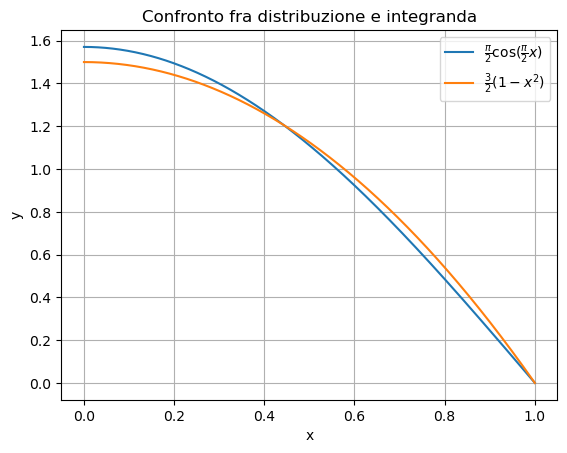

In [68]:
xs = np.linspace(0, 1, 1000)
plt.plot(xs, np.pi/2*np.cos(np.pi/2*xs), label=r"$\frac{\pi}{2}\cos(\frac{\pi}{2}x)$")
plt.plot(xs, 3./2*(1-xs**2), label=r"$\frac{3}{2}(1-x^2)$")
plt.title("Confronto fra distribuzione e integranda")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

Per la stima degli errori ho usato come al solito il metodo del data blocking, con $100$ blocchi di $1000$ estrazioni l'uno. Disegnamo il grafico delle medie in funzione del blocco nel caso del campionamento dalla distribuzione uniforme:

In [69]:
valUnif = np.loadtxt("lsn2.1_uniform.dat", usecols=0)
errUnif = np.loadtxt("lsn2.1_uniform.dat", usecols=1)

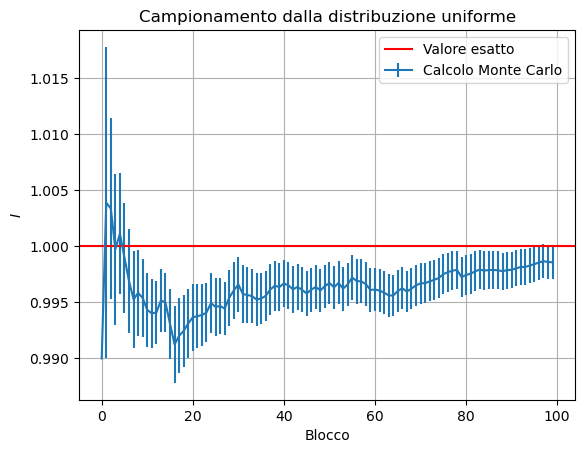

In [70]:
xs = np.arange(len(valUnif))
plt.errorbar(xs, valUnif, yerr=errUnif, label="Calcolo Monte Carlo")
plt.axhline(y=1, color="red", label="Valore esatto")
plt.title("Campionamento dalla distribuzione uniforme")
plt.xlabel("Blocco")
plt.ylabel("$I$")
plt.legend()
plt.grid(True)

Disegnamo il grafico delle medie in funzione del blocco anche nel caso dell'importance sampling:

In [71]:
valMine = np.loadtxt("lsn2.1_mine.dat", usecols=0)
errMine = np.loadtxt("lsn2.1_mine.dat", usecols=1)

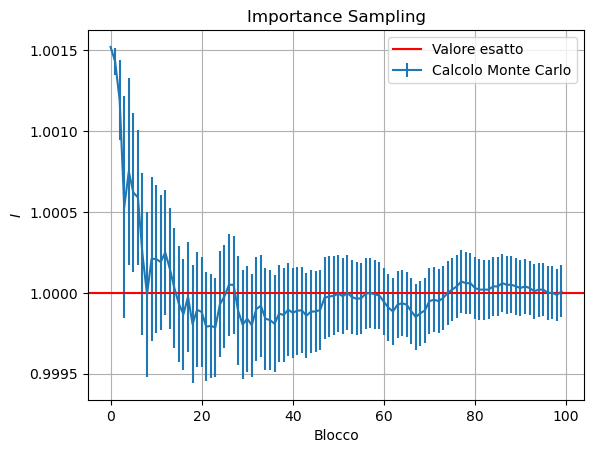

In [72]:
plt.errorbar(xs, valMine, yerr=errMine, label="Calcolo Monte Carlo")
plt.axhline(y=1, color="red", label="Valore esatto")
plt.title("Importance Sampling")
plt.xlabel("Blocco")
plt.ylabel("$I$")
plt.grid(True)
plt.legend()

Vediamo che in entrambi i casi c'è convergenza al valore esatto, ma l'importance sampling riduce gli errori, come ci aspettiamo (otteniamo una riduzione di un ordine di grandezza).

### Esercizio 2.2

In questo esercizio dobbiamo simulare un cammino aleatorio su un reticolo cubico e nel continuo, e verificare che la media della distanza percorsa scala come la radice del numero di passi.

Per generare un passo lungo un reticolo cubico estraggo due numeri da una distribuzione uniforme: uno determina la direzione del passo, l'altro se il passo sia nel verso positivo o negativo (nel modo solito di scegliere fra $k$ alternative con probabilità uniforme: dividere un intervallo in $k$ parti uguali e a ogni parte far corrispondere un'alternativa, poi estrarre un punto nell'intervallo con probabilità uniforme e scegliere l'alternativa a seconda della parte in cui cade il punto). Per generare un passo nel continuo, che equivale a campionare punti sulla superficie di una sfera con probabilità uniforme, uso un metodo accept-reject: genero un punto in $[-1, 1]^3$ con probabilità uniforme e lo rigetto se non sta all'interno della sfera unitaria. Quando ho accettato un punto lo riscalo in modo che abbia la lunghezza adeguata. In entrambi i casi ho scelto come lunghezza del passo $L=1$.

Per calcolare la media della distanza percorsa con il suo errore ho usato il data blocking, simulando $100$ blocchi di $100$ cammini (costituiti da $100$ passi) ciascuno. Per ogni blocco ho calcolato $\sqrt{\langle r^2\rangle},$ e usato questo valore come media del blocco: questo calcolo viene poi ripetuto per ogni passo del cammino aleatorio.

Disegnamo il grafico delle distanze medie (qui mostro il valore finale, ottenuto con tutti i blocchi) in funzione del passo:

In [73]:
discreteMeans, discreteErrors = np.loadtxt("discreteRW.dat", unpack=True)

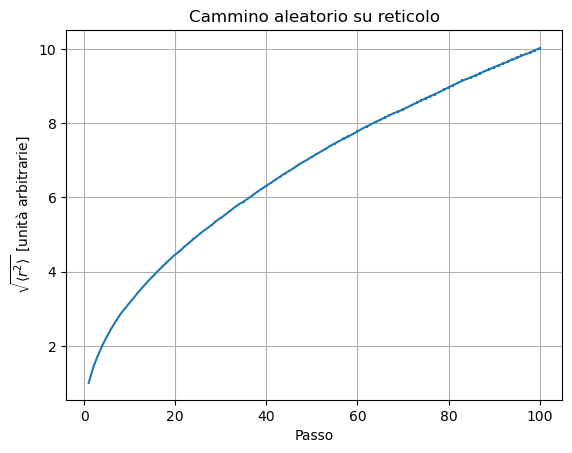

In [74]:
steps = np.arange(1, len(discreteMeans)+1)
plt.errorbar(steps, discreteMeans, yerr=discreteErrors)
plt.title("Cammino aleatorio su reticolo")
plt.xlabel("Passo")
plt.ylabel(r"$\sqrt{\langle r^2\rangle}$ [unità arbitrarie]")
plt.grid()

Il grafico sembre essere quello di una radice. Per verificarlo facciamo un fit con una funzione $f(N) = \lambda\sqrt{N}$, dove $\lambda$ mi aspetto che venga uguale alla lunghezza del singolo passo. Siccome gli errori sono molto più piccoli della scala del grafico, per vederli bene disegnamo il grafico della differenza fra la media delle distanze e il valore di $f(N)$.

In [75]:
def f(N, lam): return lam*np.sqrt(N)

Per eseguire il fit rimuovo la distanza dopo il primo passo, che non ha errore.

In [76]:
popt, pcov = scipy.optimize.curve_fit(f, steps[1:], discreteMeans[1:], sigma=discreteErrors[1:])

In [77]:
print("Dal fit lambda =", popt[0])

Dal fit lambda = 1.0004974318869801


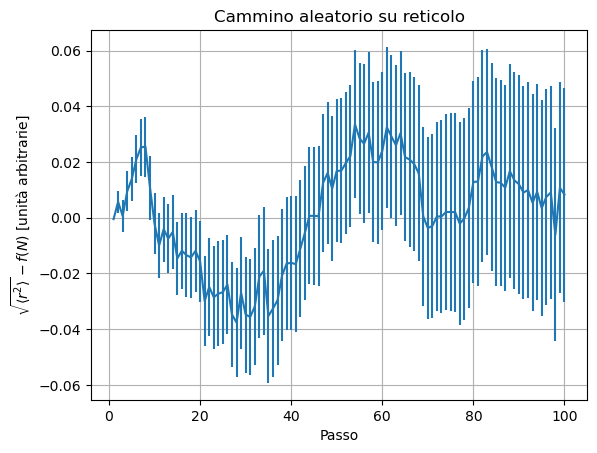

In [78]:
fitted_positions = f(steps, *popt)
plt.errorbar(steps, discreteMeans-fitted_positions, yerr=discreteErrors)
plt.title("Cammino aleatorio su reticolo")
plt.xlabel("Passo")
plt.ylabel(r"$\sqrt{\langle r^2\rangle} - f(N)$ [unità arbitrarie]")
plt.grid()

Facciamo la stessa cosa nel caso del cammino aleatorio nel continuo:

In [79]:
continuousMeans, continuousErrors = np.loadtxt("continuousRW.dat", unpack=True)

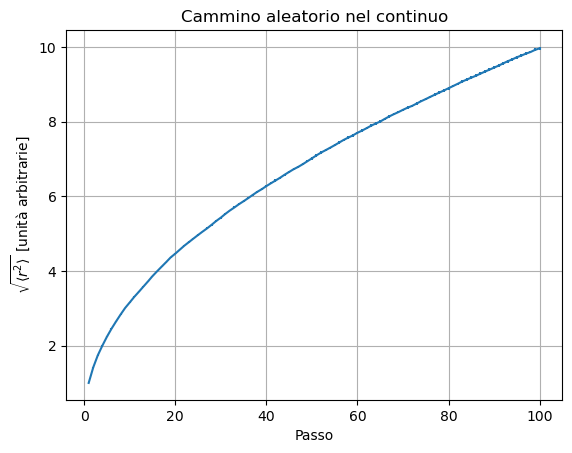

In [80]:
steps = np.arange(1, len(continuousMeans)+1)
plt.errorbar(steps,continuousMeans, yerr=continuousErrors)
plt.title("Cammino aleatorio nel continuo")
plt.xlabel("Passo")
plt.ylabel(r"$\sqrt{\langle r^2\rangle}$ [unità arbitrarie]")
plt.grid()

In [81]:
def f(N, lam): return lam*np.sqrt(N)

In [82]:
popt, pcov = scipy.optimize.curve_fit(f, steps[1:], continuousMeans[1:], sigma=continuousErrors[1:])

In [83]:
print("Dal fit lambda =", popt[0])

Dal fit lambda = 0.9950812815906391


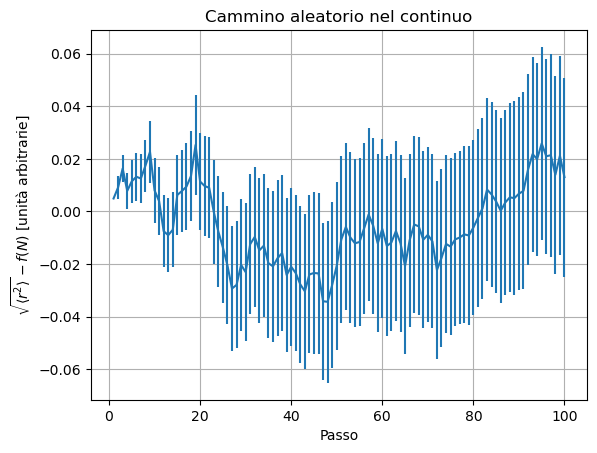

In [84]:
fitted_positions = f(steps, *popt)
plt.errorbar(steps,continuousMeans-fitted_positions, yerr=continuousErrors)
plt.title("Cammino aleatorio nel continuo")
plt.xlabel("Passo")
plt.ylabel(r"$\sqrt{\langle r^2\rangle} - f(N)$ [unità arbitrarie]")
plt.grid()

Osservazioni: in entrambi i casi 

1. il fit con una legge del tipo $\lambda\sqrt{N}$ è discreto.
2. Gli errori sulla posizione media crescono man mano che il cammino si allunga: questo mi sembra ragonevole visto che la variabilità nei singoli cammini si accumula sempre di più man mano che si va avanti.
3. Il valore di $\lambda$ ottenuto dal fit in entrambi i casi è vicino alla lunghezza del passo, come ci aspettiamo.